<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/bigdata5_DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preparation
#### 붓꽃(iris) 데이터 

붓꽃(iris)의  꽃잎 (Petal)의 길이와 폭, 꽃받침(Sepal)의 길이와 폭을 측정한 값과 품종(Species: Iris-Setosa, Iris-Versicolour,Iris-Virginica)을 포함하는 데이터
![image.png](attachment:image.png)

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 수집된 데이터 구조, 속성, 내용 확인

In [ ]:
#(1)수집된 데이터 구조, 속성, 내용 확인
#irisData.csv  file read
iris= pd.read_csv('data/irisData.csv')          

#데이터 구조확인
print("#iris.shape=", iris.shape)   
print("#iris.dtypes = ", iris.dtypes)    #타입확인
print("#iris.index = ", iris.index)      #행 레이블
print("#iris.columns = ", iris.columns)  #열 레이블

#데이터 타입, 구조, 누락값 동시에 확인
print("#iris.info() = ")
iris.info()   

#데이터 내용 일부 확인
print("#iris.head=")
display(iris.head())
print("#iris.tail=")
display(iris.tail())

#iris.shape= (150, 5)
#iris.dtypes =  Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Species          object
dtype: object
#iris.index =  RangeIndex(start=0, stop=150, step=1)
#iris.columns =  Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Species'],
      dtype='object')
#iris.info() = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
#iris.head=


,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#iris.tail=


,Sepal length,Sepal width,Petal length,Petal width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 2. 결측치(Missing Values) 처리 
(1)결측치를 확인하여 개수가 적다면 삭제처리  
(2)평균값, 중앙값, 빈도수 높은 값,  특정값으로 대치  
  - 평균값(mean), 중앙값(median) 대치 : 작은 수치 데이터에 잘 작동, 범주형에는 좋지않음, 그룹별 상관관계 고려하지 않음  
  - 최빈값(mode) 대치:  범주 형에 적합, 그룹별 상관관계 고려하지 않음, 데이터에 편향을 줄 수 있음  

sklearn.impute.SimpleImputer()를 사용하여 결측치 대치처리  
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

예: SimpleImputer(strategy='constant', fill_value=0)  
- strategy 옵션   
    'mean': 평균값 (디폴트)  
    'median': 중앙값  
    'most_frequent': 최빈값  
    'constant': 특정값  



In [ ]:
# 결측치 확인,  누락된 데이터의 합을 확인
print('\n#iris Sum of Null Values \n')
s = iris.isnull().sum()
print (s)
display(iris.head())

#결측치 연습을 위해 임의로 결측치 생성 (앞에서 3개 데이터의 Sepal length, Sepal width를 non으로 처리)
iris2 = iris.copy()   #원본을 복사하여 결측치 연습 데이터 생성
iris2.iloc[0:3, 0:2]   = np.nan  #nan값 설정
display(iris2.head())

print('\n#iris2 Sum of Null Values \n')
s = iris2.isnull().sum()
print (s)


#iris Sum of Null Values 

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64


,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal length,Sepal width,Petal length,Petal width,Species
0,NaN,NaN,1.4,0.2,setosa
1,NaN,NaN,1.4,0.2,setosa
2,NaN,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



#iris2 Sum of Null Values 

Sepal length    3
Sepal width     3
Petal length    0
Petal width     0
Species         0
dtype: int64


In [ ]:
#동일한 특정값으로 결측치 채우기
iris0 = iris2.copy()
display(iris0.head())
iris0 = iris0.fillna(0)   #NaN값을 0로 채우기
display(iris0.head())
print('\n#iris0 Sum of Null Values \n')
s = iris0.isnull().sum()
print (s)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,NaN,NaN,1.4,0.2,setosa
1,NaN,NaN,1.4,0.2,setosa
2,NaN,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal length,Sepal width,Petal length,Petal width,Species
0,0.0,0.0,1.4,0.2,setosa
1,0.0,0.0,1.4,0.2,setosa
2,0.0,0.0,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



#iris0 Sum of Null Values 

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64


In [ ]:
#sklearn.impute.SimpleImputer()를 사용하여 결측치를 평균값으로 대치
from sklearn.impute import SimpleImputer
irism = iris2.copy()
display(irism.head())
imp_mean = SimpleImputer(strategy='mean')             #평균처리로 SimpleImputer객체 생성
imp_mean.fit(irism.values[:, 0:4])                    #iris 데이터를 SimpleImputer객체로 평균값 계산 
irisv = imp_mean.transform(irism.values[:, 0:4])      #평균값으로  결측치 처리
irism.iloc[:, 0:4] =  irisv                           #결측치 처리된 내용으로 수정
display(irism.head())
print('\n#irism Sum of Null Values \n')
s = irism.isnull().sum()
print (s)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,NaN,NaN,1.4,0.2,setosa
1,NaN,NaN,1.4,0.2,setosa
2,NaN,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.862585,3.053741,1.4,0.2,setosa
1,5.862585,3.053741,1.4,0.2,setosa
2,5.862585,3.053741,1.3,0.2,setosa
3,4.600000,3.100000,1.5,0.2,setosa
4,5.000000,3.600000,1.4,0.2,setosa



#irism Sum of Null Values 

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64


In [ ]:
#sklearn.impute.SimpleImputer()를 사용하여 결측치를 특정값으로 대치
from sklearn.impute import SimpleImputer
iris00 = iris2.copy()
display(iris00.head())
imp_0 = SimpleImputer(strategy='constant', fill_value=0)    #특정값 0 처리로 SimpleImputer객체 생성
imp_0.fit(iris00.values[:, 0:4])                    #iris 데이터를 SimpleImputer객체로 0처리 
irisv = imp_0.transform(iris00.values[:, 0:4])      #0값으로  결측치 처리
iris00.iloc[:, 0:4] =  irisv                        #결측치 처리된 내용으로 수정
display(iris00.head())
print('\n#iris00 Sum of Null Values \n')
s = iris00.isnull().sum()
print (s)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,NaN,NaN,1.4,0.2,setosa
1,NaN,NaN,1.4,0.2,setosa
2,NaN,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal length,Sepal width,Petal length,Petal width,Species
0,0.0,0.0,1.4,0.2,setosa
1,0.0,0.0,1.4,0.2,setosa
2,0.0,0.0,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



#iris00 Sum of Null Values 

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64


In [ ]:
#누락된 값 있는 행삭제
display(iris2.head())
iris2.dropna(how='any', inplace=True) 
display(iris2.head())
print('\n#iris00 Sum of Null Values \n')
s = iris2.isnull().sum()
print (s)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,NaN,NaN,1.4,0.2,setosa
1,NaN,NaN,1.4,0.2,setosa
2,NaN,NaN,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal length,Sepal width,Petal length,Petal width,Species
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa



#iris00 Sum of Null Values 

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Species         0
dtype: int64


### 3. 중복데이터 처리

중복 데이터가 있는지 확인   
  -  DataFrame.duplicated()

중복값 처리 : 유일한 키값 1개만 남기고 나머지 중복데이터는 제거  
  -  DataFrame.drop_duplicates()


In [ ]:
#중복 데이터 확인 및 삭제
iris3 = iris.copy()
iris3 = iris3.append(iris3.loc[0])  #중복 데이터 생성
display(iris3.head())
display(iris3.tail())
print(iris3.duplicated())   #중복 데이터 일 경우 TRUE
s = iris3.duplicated().sum()   #중복 데이터 개수 확인
print("iris3.duplicated().sum()=", s)  
iris3 = iris3.drop_duplicates()   #중복 데이터 삭제
display(iris3.tail())

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal length,Sepal width,Petal length,Petal width,Species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
0,5.1,3.5,1.4,0.2,setosa


0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
0       True
Length: 151, dtype: bool
iris3.duplicated().sum()= 2


,Sepal length,Sepal width,Petal length,Petal width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 4.  이상치(Outlier) 처리
![image.png](attachment:image.png)


#setosa.describe()=
        Sepal length  Sepal width  Petal length  Petal width
count      50.00000    50.000000     50.000000    50.000000
mean        5.00600     3.428000      1.462000     0.246000
std         0.35249     0.379064      0.173664     0.105386
min         4.30000     2.300000      1.000000     0.100000
25%         4.80000     3.200000      1.400000     0.200000
50%         5.00000     3.400000      1.500000     0.200000
75%         5.20000     3.675000      1.575000     0.300000
max         5.80000     4.400000      1.900000     0.600000
dataframe =  setosa
column name =  Sepal width
Q1= 3.2
Q3=3.68
IQR=0.48


'outliers='

,Sepal length,Sepal width,Petal length,Petal width,Species
15,5.7,4.4,1.5,0.4,setosa
41,4.5,2.3,1.3,0.3,setosa


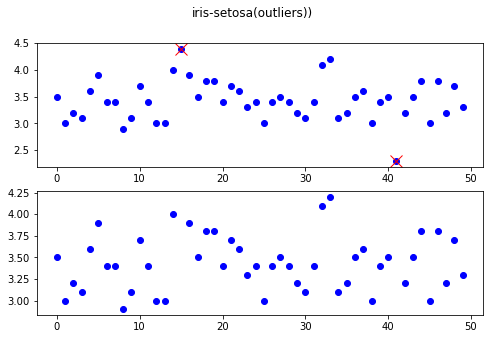

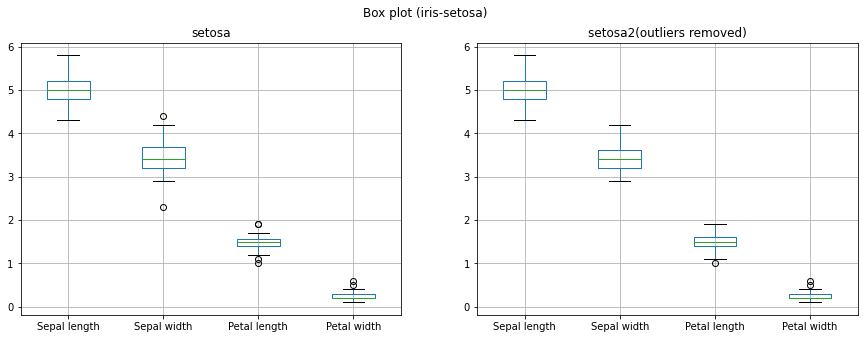

In [ ]:
# outlier 추출함수
def outlier(dfin, dfname, colname):  
    Q1 = dfin[colname].quantile(0.25)      #25% quantile 
    Q3 = dfin[colname].quantile(0.75)      #75% quantile
    IQR = Q3 - Q1 
    lowerW  = Q1 - 1.5 * IQR              #lower whisker
    upperW  = Q3 + 1.5 * IQR              #upper whisker
    print ("dataframe = ", dfname)
    print ("column name = ", colname)
    print ("Q1=", Q1)
    print ("Q3={0:.2f}".format(Q3))
    print ("IQR={0:.2f}".format(IQR))
    #lower whisker~upper whisker 범위를 벗어난값
    outdt = dfin.loc[(dfin[colname] < lowerW) | (dfin[colname] >  upperW)]      
    return outdt

#setosa data만 추출하여 요약통계
setosa = iris[iris['Species']=='setosa']
print("#setosa.describe()=\n", setosa.describe())

#outlier 추출
outliers = outlier(setosa, 'setosa', 'Sepal width')  #setosa의 sepal width에 대한 outlier 추출
display("outliers=", outliers)
#outlier 제거
setosa2=setosa.drop(outliers.index) #추출된 outlier의 인덱스로 해당 데이터 제거

#outlier plot 확인
plt.figure(1, figsize=(8, 5))  #그림의 폭,높이 사이즈 설정
plt.subplot(2,1, 1)            #행의 수, 열의 수, 인덱스로 첫번째 서브플롯 접근       
plt.plot(setosa.index, setosa['Sepal width'], 'bo')  #outlier 제거전 데이터 플롯
plt.plot(outliers.index, outliers['Sepal width'], 'rx',  markersize=12) #outlier X 표시
plt.subplot(2,1, 2)            #행의수, 열의수, 인덱스로 두번째 서브플롯 접근       
plt.plot(setosa2.index, setosa2['Sepal width'], 'bo') #outlier 제거후 데이터 플롯
plt.suptitle('iris-setosa(outliers))')
plt.show()


#boxplot 확인
plt.figure(1, figsize=(15, 5))  
plt.subplot(1,2, 1)                  
setosa.boxplot()
plt.title('setosa')
plt.subplot(1, 2, 2)
plt.title('setosa2(outliers removed)')
setosa2.boxplot()
plt.suptitle('Box plot (iris-setosa)')
plt.show()